In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(gridExtra))

tmp.dir <- "/scratch/PI/candes/ukbiobank_tmp"

experiment <- "four"

# Load caviar results
lmm.file <- sprintf("%s/simulations/summary/lmm_%s_fine.txt", tmp.dir, experiment)
Results.lmm <- read_delim(lmm.file, delim=" ", col_types=cols())

# Load knockoffs results
knockoffs.file <- sprintf("%s/simulations/summary/knockoffs_%s_fine.txt", tmp.dir, experiment)
Results.knockoffs <- read_delim(knockoffs.file, delim=" ", col_types=cols())

In [3]:
# Combine results
Results.lmm.tmp <- Results.lmm %>% 
    mutate(Method.type=Method, Method=paste(Method, Clumping, Rho, sep="_")) %>% 
    select(-c("Clumping", "Rho"))
Results.knockoffs.tmp <- Results.knockoffs %>%
    mutate(Method.type=Method, Method=paste(Method, Resolution, sep="_")) %>% 
    select(-c("Resolution"))
Results <- rbind(Results.lmm.tmp, Results.knockoffs.tmp) %>% as_tibble()

Warning message:
“Removed 72 rows containing missing values (geom_errorbar).”Warning message:
“Removed 72 rows containing missing values (geom_errorbar).”

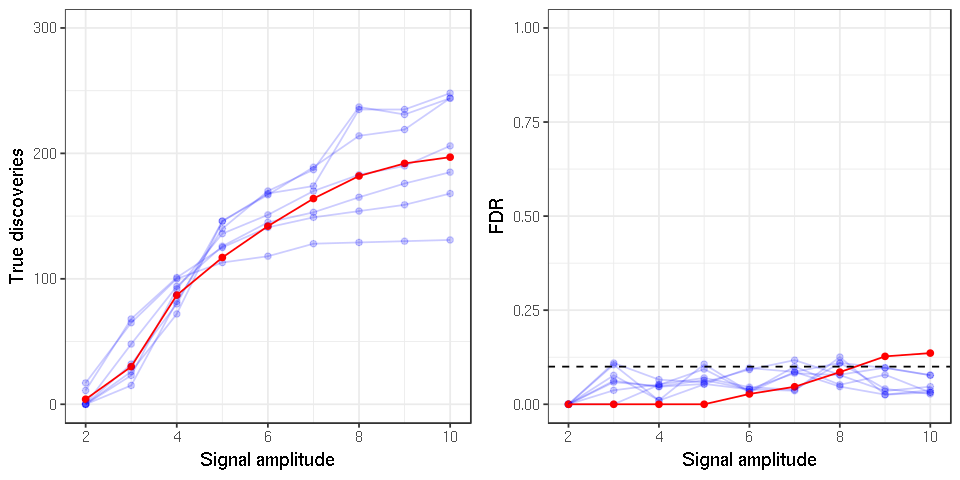

In [4]:
Summary <- Results %>% 
    filter(Method %in% c("LMM_5e-08_1", "Knockoffs_Radj2", "Knockoffs_Radj5",
                         "Knockoffs_Radj10", "Knockoffs_Radj20", "Knockoffs_Radj50",
                         "Knockoffs_Radj75", "Knockoffs_Radj100")) %>%
    group_by(Method.type, Method, Amplitude) %>%
    summarise(Discoveries.true.sd=2*sd(Discoveries.true)/sqrt(n()),
              Discoveries.true=mean(Discoveries.true), 
              Power.sd=2*sd(Power)/sqrt(n()), FDR.sd=2*sd(FDP)/sqrt(n()),
              Power=mean(Power), FDR=mean(FDP),
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method.type, Method, Amplitude, 
           FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Power, Power.sd, Size, BP.width)

options(repr.plot.width=8, repr.plot.height=4)

p.pow <- Summary %>%
    ggplot(aes(x=Amplitude, y=Discoveries.true, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=Discoveries.true-Discoveries.true.sd, 
                                ymax=Discoveries.true+Discoveries.true.sd)) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.2, 1)) +
    ylim(0,300) +
    xlab("Signal amplitude") + ylab("True discoveries") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

p.fdp <- Summary %>%
    ggplot(aes(x=Amplitude, y=FDR, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=FDR-FDR.sd, 
                                ymax=FDR+FDR.sd)) +
    geom_hline(yintercept=0.1, linetype=2) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.2, 1)) +
    ylim(0,1) +
    xlab("Signal amplitude") + ylab("FDR") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

pp <- grid.arrange(p.pow, p.fdp, nrow = 1)
p.file <- "figures/fine_5e-08_1.png"
ggsave(p.file, pp, width=8, height=4)

Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_path).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_path).”

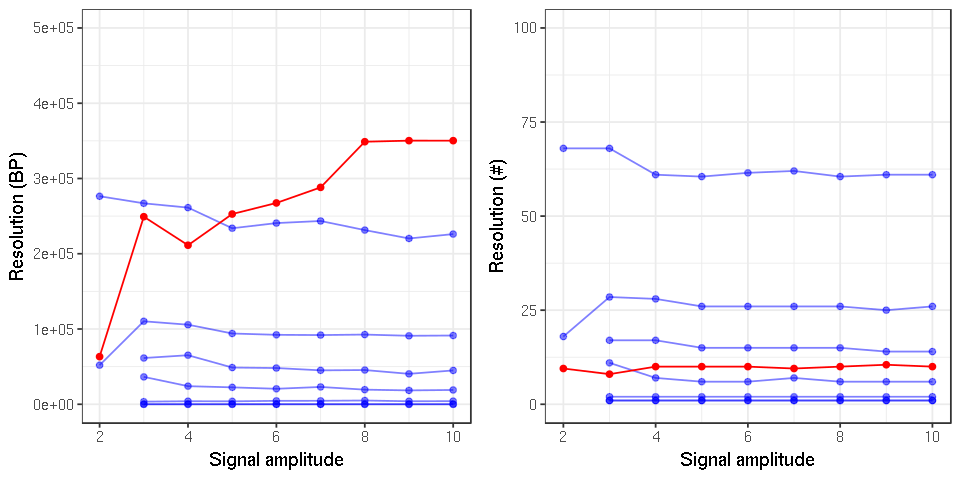

In [5]:
Summary <- Results %>% 
    filter(Method %in% c("LMM_5e-08_1",
                         "Knockoffs_Radj2", "Knockoffs_Radj5",
                         "Knockoffs_Radj10", "Knockoffs_Radj20", "Knockoffs_Radj50",
                         "Knockoffs_Radj75", "Knockoffs_Radj100")) %>%
    group_by(Method.type, Method, Amplitude) %>%
    summarise(Discoveries.true.sd=2*sd(Discoveries.true)/sqrt(n()),
              Discoveries.true=mean(Discoveries.true), 
              Power.sd=2*sd(Power)/sqrt(n()), FDR.sd=2*sd(FDP)/sqrt(n()),
              Power=mean(Power), FDR=mean(FDP),
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method.type, Method, Amplitude, 
           FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Power, Power.sd, Size, BP.width)

p.BP <- Summary %>%
    ggplot(aes(x=Amplitude, y=BP.width, group=Method, color=Method.type,  alpha=Method.type)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.5, 1)) +
    xlab("Signal amplitude") + ylab("Resolution (BP)") +
    ylim(0,500000) +
    theme_bw() + theme(legend.position="none")

p.N <- Summary %>%
    ggplot(aes(x=Amplitude, y=Size, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.5, 1)) +
    xlab("Signal amplitude") + ylab("Resolution (#)") +
    ylim(0,100) +
    theme_bw() + theme(legend.position="none")

pp <- grid.arrange(p.BP, p.N, nrow = 1)
p.file <- "figures/fine_resolution_5e-08_1.png"
ggsave(p.file, pp, width=8, height=4)

## Outer-node knockoffs

Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

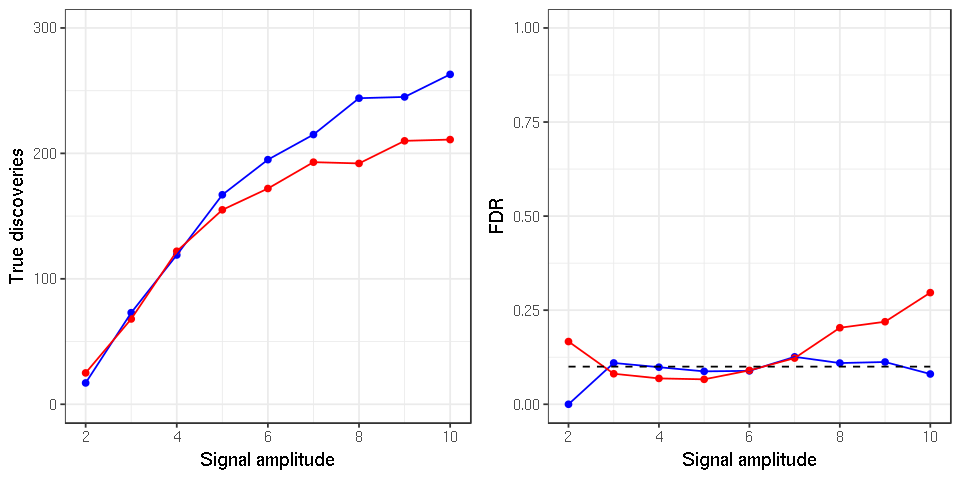

In [6]:
# Load knockoffs results with outer-node filter
knockoffs.outer.file <- sprintf("%s/simulations/summary/knockoffs_%s_fine_outer.txt", 
                                tmp.dir, experiment)
Results.knockoffs.outer <- read_delim(knockoffs.outer.file, delim=" ", col_types=cols()) %>%
    mutate(Method = "Knockoffs_outer")

Summary.outer <- Results.knockoffs.outer %>% 
    group_by(Method, Amplitude) %>%
    summarise(Discoveries.true.sd = 2*sd(Discoveries.true)/sqrt(n()),
              Discoveries.true=mean(Discoveries.true),
              FDR.sd=2*sd(FDP)/sqrt(n()), FDR=mean(FDP),
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method, Amplitude, FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Size, BP.width)

# LMM parameters
threshold <- "1e-05"
rho <- "1"

# Summarise LMM results
Summary.LMM <- Results.lmm.tmp %>%
    filter(Method %in% c("Knockoffs_outer", sprintf("LMM_%s_%s", threshold, rho))) %>%
    group_by(Method, Amplitude) %>%
    summarise(Discoveries.true.sd = 2*sd(Discoveries.true)/sqrt(n()), 
              Discoveries.true=mean(Discoveries.true),
              FDR.sd=2*sd(FDP)/sqrt(n()), FDR=mean(FDP), 
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method, Amplitude, FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Size, BP.width)

FDR.dummy <- tibble(Amplitude=unique(Summary.outer$Amplitude), FDR=0.1)

p.pow <- rbind(Summary.outer, Summary.LMM) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Discoveries.true, color=Method)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=Discoveries.true-Discoveries.true.sd, 
                                ymax=Discoveries.true+Discoveries.true.sd)) +
    scale_colour_manual(values = c("blue", "red")) +
    ylim(0,300) +
    xlab("Signal amplitude") + ylab("True discoveries") +
    theme_bw() + theme(legend.position="none")

p.fdp <- rbind(Summary.outer, Summary.LMM) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=FDR, color=Method)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=FDR-FDR.sd, ymax=FDR+FDR.sd)) +
    geom_line(data=FDR.dummy, aes(color="red"), color="black", linetype="dashed") +
    scale_colour_manual(values = c("blue", "red")) +
    ylim(0,1) +
    xlab("Signal amplitude") + ylab("FDR") +
    theme_bw() + theme(legend.position="none")

pp <- grid.arrange(p.pow, p.fdp, nrow = 1)
p.file <- sprintf("figures/fine_%s_%s_outer.png", threshold, rho)
ggsave(p.file, pp, width=8, height=4)

## LMM with oracle FDR control

Joining, by = c("Method", "Amplitude", "FDR", "FDR.sd", "Discoveries.true", "Discoveries.true.sd", "Size", "BP.width")
Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

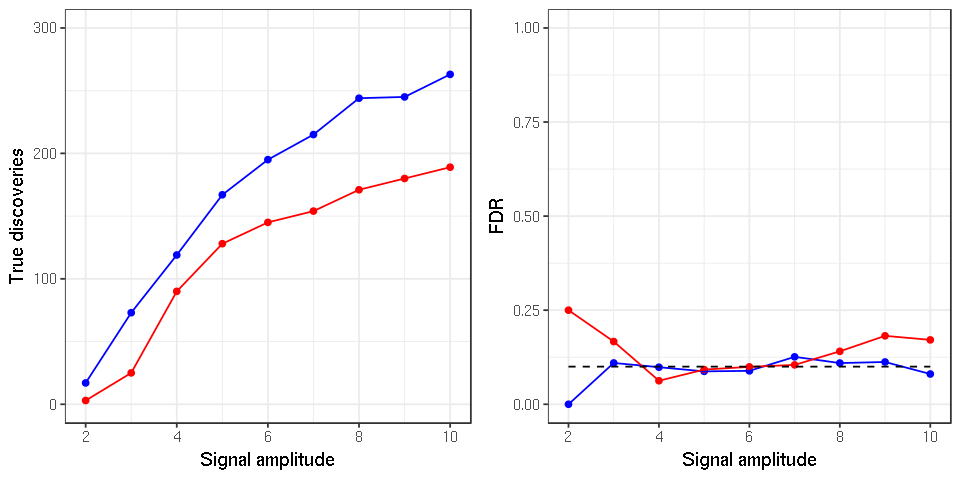

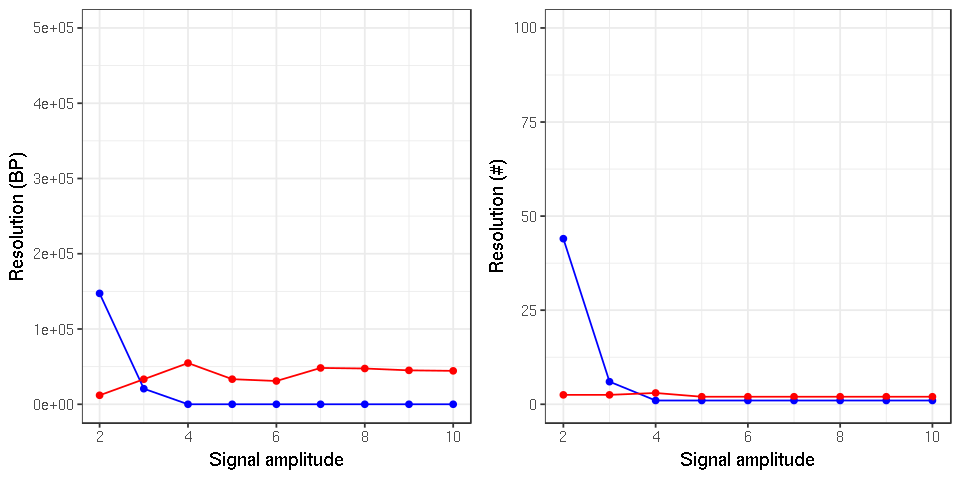

In [12]:
rho <- 0.9

# LMM with oracle FDR control
Summary.LMM.oracle <- Results.lmm.tmp %>% filter(endsWith(Method,sprintf("_%s",rho))) %>%
    group_by(Method, Amplitude) %>%
    summarise(Discoveries.true.sd = 2*sd(Discoveries.true)/sqrt(n()), 
              Discoveries.true=mean(Discoveries.true),
              FDR.sd=2*sd(FDP)/sqrt(n()), FDR=mean(FDP), 
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    group_by(Amplitude) %>%
    filter(FDR<=0.11) %>%
    summarise(Oracle = which.max(Discoveries.true),
              Discoveries.true.sd = Discoveries.true.sd[Oracle], Discoveries.true=Discoveries.true[Oracle],
              FDR.sd=FDR.sd[Oracle], FDR=FDR[Oracle],
              Size=Size[Oracle], BP.width=BP.width[Oracle]) %>%
    mutate(Method="LMM_oracle") %>%
    select(Method, Amplitude, FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Size, BP.width)

Summary.LMM.oracle <- Results.lmm.tmp %>%
    filter(Method %in% c(sprintf("LMM_5e-08_%s", rho))) %>%
    group_by(Method, Amplitude) %>%
    summarise(Discoveries.true.sd = 2*sd(Discoveries.true)/sqrt(n()), 
              Discoveries.true=mean(Discoveries.true),
              FDR.sd=2*sd(FDP)/sqrt(n()), FDR=mean(FDP), 
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method, Amplitude, FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Size, BP.width) %>%
    mutate(Method="LMM_oracle") %>%
    anti_join(Summary.LMM.oracle, by = c("Method", "Amplitude")) %>%
    full_join(Summary.LMM.oracle)

p.pow <- rbind(Summary.outer, Summary.LMM.oracle) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Discoveries.true, color=Method)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=Discoveries.true-Discoveries.true.sd, 
                                ymax=Discoveries.true+Discoveries.true.sd)) +
    scale_colour_manual(values = c("blue", "red")) +
    ylim(0,300) +
    xlab("Signal amplitude") + ylab("True discoveries") +
    theme_bw() + theme(legend.position="none")

p.fdp <- rbind(Summary.outer, Summary.LMM.oracle) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=FDR, color=Method)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=FDR-FDR.sd, ymax=FDR+FDR.sd)) +
    geom_line(data=FDR.dummy, aes(color="red"), color="black", linetype="dashed") +
    scale_colour_manual(values = c("blue", "red")) +
    ylim(0,1) +
    xlab("Signal amplitude") + ylab("FDR") +
    theme_bw() + theme(legend.position="none")

pp <- grid.arrange(p.pow, p.fdp, nrow = 1)
p.file <- sprintf("figures/fine_oracle_%s_outer.png", rho)
ggsave(p.file, pp, width=8, height=4)

p.BP <- rbind(Summary.outer, Summary.LMM.oracle) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=BP.width, group=Method, color=Method,  alpha=Method)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(1, 1)) +
    xlab("Signal amplitude") + ylab("Resolution (BP)") +
    ylim(0,500000) +
    theme_bw() + theme(legend.position="none")

p.N <- rbind(Summary.outer, Summary.LMM.oracle) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Size, group=Method, color=Method, alpha=Method)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(1, 1)) +
    xlab("Signal amplitude") + ylab("Resolution (#)") +
    ylim(0,100) +
    theme_bw() + theme(legend.position="none")

pp <- grid.arrange(p.BP, p.N, nrow = 1)
p.file <- sprintf("figures/fine_resolution_oracle_%s_outer.png", rho)
ggsave(p.file, pp, width=8, height=4)

## Knockoffs at multiple resolutions vs. oracle

Warning message:
“Removed 72 rows containing missing values (geom_errorbar).”Warning message:
“Removed 72 rows containing missing values (geom_errorbar).”

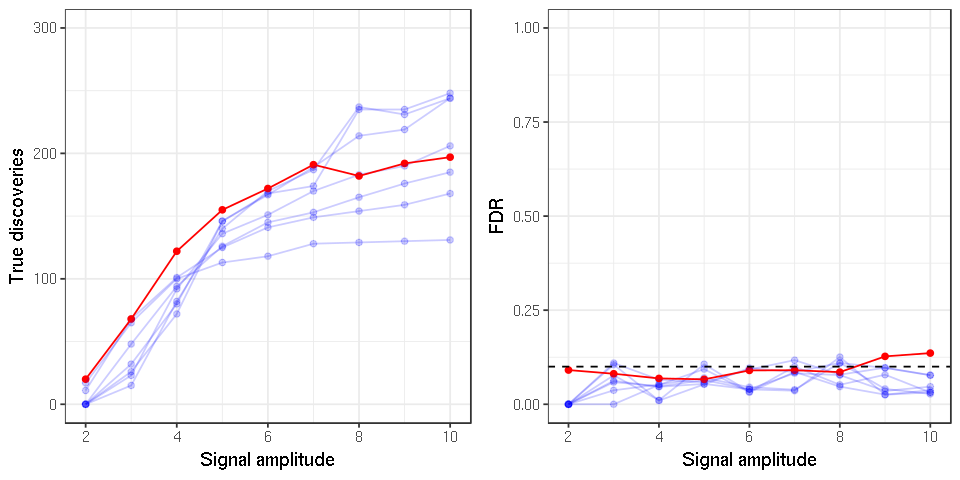

In [9]:
Summary.knockoffs <- Results %>% 
    filter(Method %in% c("Knockoffs_Radj2", "Knockoffs_Radj5",
                         "Knockoffs_Radj10", "Knockoffs_Radj20", "Knockoffs_Radj50",
                         "Knockoffs_Radj75", "Knockoffs_Radj100")) %>%
    group_by(Method.type, Method, Amplitude) %>%
    summarise(Discoveries.true.sd=2*sd(Discoveries.true)/sqrt(n()),
              Discoveries.true=mean(Discoveries.true), 
              Power.sd=2*sd(Power)/sqrt(n()), FDR.sd=2*sd(FDP)/sqrt(n()),
              Power=mean(Power), FDR=mean(FDP),
              Size=mean(Size,na.rm=TRUE), BP.width=mean(BP.width,na.rm=TRUE)) %>%
    ungroup() %>%
    select(Method.type, Method, Amplitude, 
           FDR, FDR.sd, Discoveries.true, Discoveries.true.sd, Size, BP.width)

options(repr.plot.width=8, repr.plot.height=4)

p.pow <- rbind(Summary.knockoffs, mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Discoveries.true, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=Discoveries.true-Discoveries.true.sd, 
                                ymax=Discoveries.true+Discoveries.true.sd)) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.2, 1)) +
    ylim(0,300) +
    xlab("Signal amplitude") + ylab("True discoveries") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

p.fdp <- rbind(Summary.knockoffs, mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=FDR, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=FDR-FDR.sd, 
                                ymax=FDR+FDR.sd)) +
    geom_hline(yintercept=0.1, linetype=2) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.2, 1)) +
    ylim(0,1) +
    xlab("Signal amplitude") + ylab("FDR") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

pp <- grid.arrange(p.pow, p.fdp, nrow = 1)
p.file <- "figures/fine_oracle_multiple.png"
ggsave(p.file, pp, width=8, height=4)

Saving plot on figures/fine_oracle_1_Radj2.png


Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

Saving plot on figures/fine_oracle_1_Radj5.png


Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

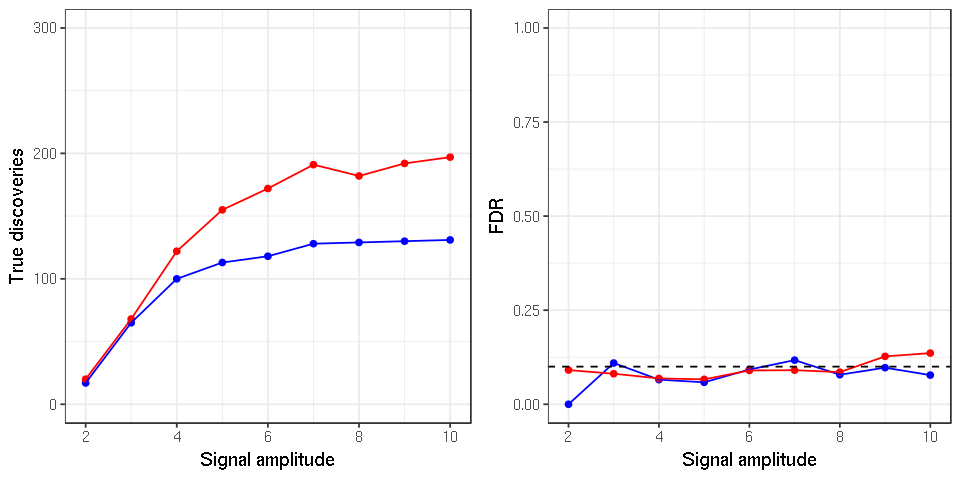

Saving plot on figures/fine_oracle_1_Radj10.png


Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

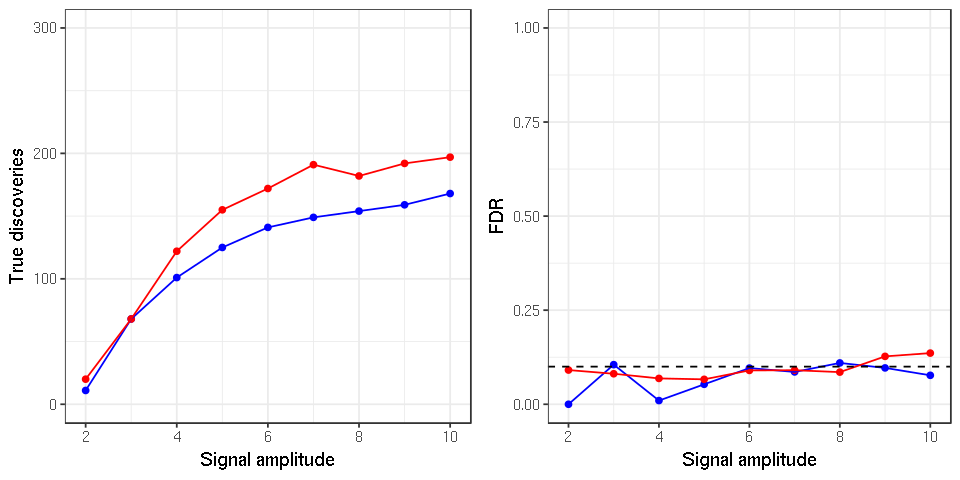

Saving plot on figures/fine_oracle_1_Radj50.png


Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

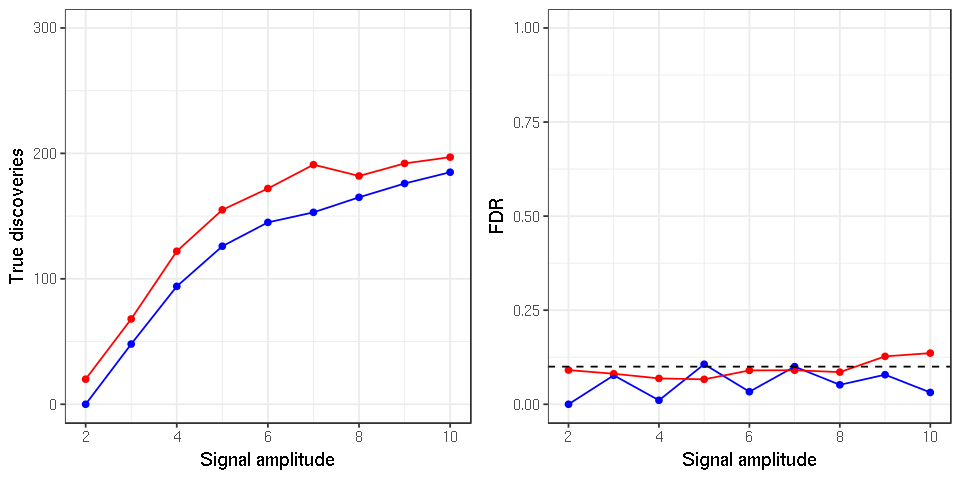

Saving plot on figures/fine_oracle_1_Radj100.png


Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”Warning message:
“Removed 18 rows containing missing values (geom_errorbar).”

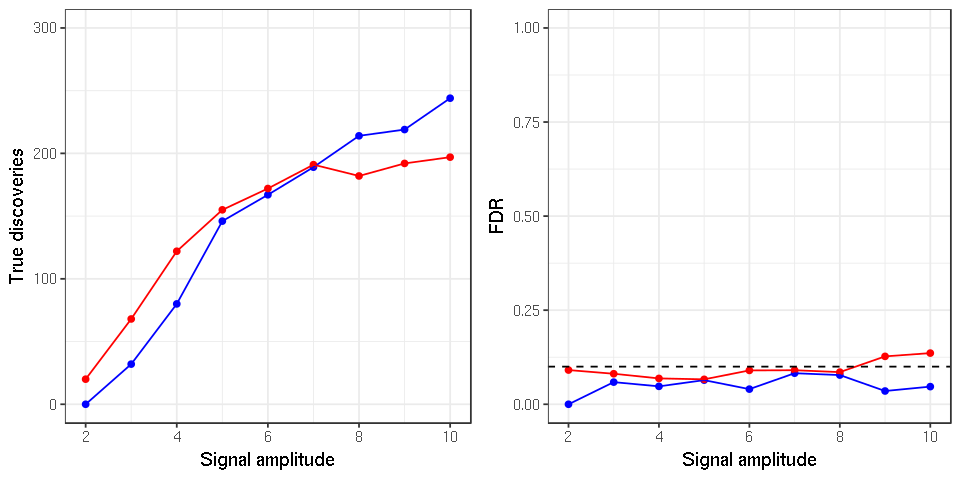

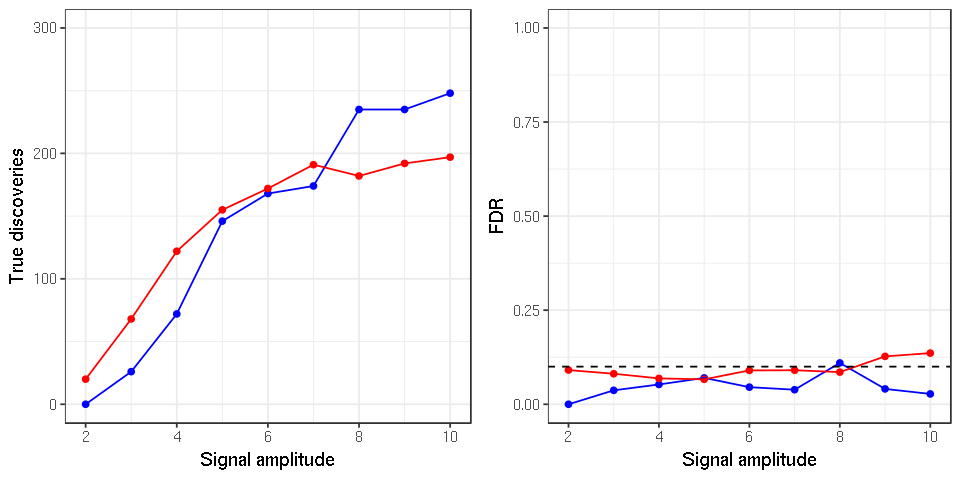

In [10]:
# Automatic plotting

Params <- tribble(
  ~rho,  ~resolution,
  1,  "Radj2",
  1,  "Radj5",
  1,  "Radj10",
  1,  "Radj50",
  1,  "Radj100",
)

plot.fine <- function(rho, resolution) {
    p.pow <- rbind(
        filter(Summary.knockoffs, Method==sprintf("Knockoffs_%s",resolution)),
        mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Discoveries.true, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=Discoveries.true-Discoveries.true.sd, 
                                ymax=Discoveries.true+Discoveries.true.sd)) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(1, 1)) +
    ylim(0,300) +
    xlab("Signal amplitude") + ylab("True discoveries") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

p.fdp <- rbind(
        filter(Summary.knockoffs, Method==sprintf("Knockoffs_%s",resolution)),
        mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=FDR, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    geom_errorbar(width=.1, aes(ymin=FDR-FDR.sd, 
                                ymax=FDR+FDR.sd)) +
    geom_hline(yintercept=0.1, linetype=2) +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(1, 1)) +
    ylim(0,1) +
    xlab("Signal amplitude") + ylab("FDR") +
    theme_bw() + guides(colour = guide_legend(ncol = 2)) + theme(legend.position="none")

    p.grid <- grid.arrange(p.pow, p.fdp, nrow = 1)
}

for(idx in 1:nrow(Params)) {
    rho <- Params$rho[idx]
    resolution <- Params$resolution[idx]
    p.file <- sprintf("figures/fine_oracle_%d_%s.png", rho, resolution)
    cat(sprintf("Saving plot on %s\n", p.file))
    pp <- plot.fine(rho, resolution)
    ggsave(p.file, pp, width=8, height=4)
}

Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_path).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_path).”

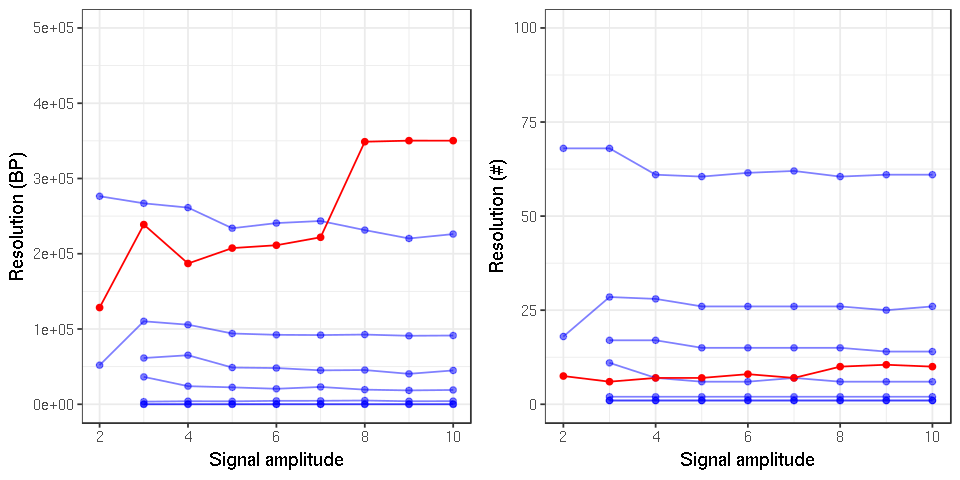

In [11]:

p.BP <- rbind(Summary.knockoffs, mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=BP.width, group=Method, color=Method.type,  alpha=Method.type)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.5, 1)) +
    xlab("Signal amplitude") + ylab("Resolution (BP)") +
    ylim(0,500000) +
    theme_bw() + theme(legend.position="none")

p.N <- rbind(Summary.knockoffs, mutate(Summary.LMM.oracle, Method.type="LMM")) %>% as_tibble() %>%
    ggplot(aes(x=Amplitude, y=Size, group=Method, color=Method.type, alpha=Method.type)) +
    geom_point() + geom_line() +
    scale_colour_manual(values = c("blue", "red")) +
    scale_alpha_manual(values = c(0.5, 1)) +
    ylim(0,100) +
    xlab("Signal amplitude") + ylab("Resolution (#)") +
    theme_bw() + theme(legend.position="none")

pp <- grid.arrange(p.BP, p.N, nrow = 1)
p.file <- "figures/fine_resolution_oracle.png"
ggsave(p.file, pp, width=8, height=4)